In [2]:
import pandas as pd
import numpy as np
import altair as alt

from pycaret.classification import *
from imblearn.over_sampling import SMOTENC

# The Data

In [3]:
data = pd.read_csv("./heart_2020.csv")
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Number of Datapoints: 319795


<AxesSubplot:>

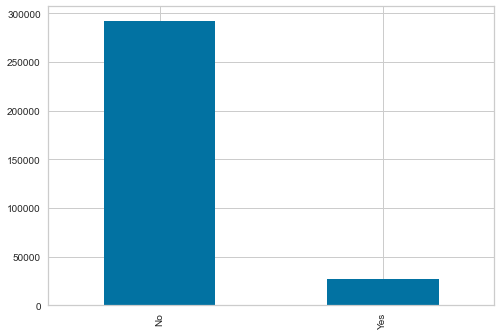

In [5]:
print("Number of Datapoints:", len(data))
data.HeartDisease.value_counts().plot.bar()

### Data Oversampling – SMOTE
The above chart suggests that the data is severely imbalanced. To overcome this, we will oversample the data using SMOTE.

In [6]:
# Oversample with SMOTE
oversample = SMOTENC(
    categorical_features=[1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16],
    sampling_strategy='not majority',
    k_neighbors=512
)

data_labels = np.where(data.HeartDisease.to_numpy() == "Yes", 1, 0)
features, labels = oversample.fit_resample(data.to_numpy()[:,1:], data_labels)

print("Number of Datapoints:", len(features))

features_and_labels = np.hstack((features, labels.reshape(-1, 1)))
smote_dataset = pd.DataFrame(features_and_labels, columns=[*data.columns[1:], "HeartDisease"])

smote_dataset   

Number of Datapoints: 584844


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,33.712337,Yes,No,No,30.0,0.0,Yes,Male,70-74,White,No,No,Fair,8.691772,No,No,No,1
584840,31.272248,Yes,No,No,4.161897,28.335241,No,Female,70-74,White,No,Yes,Good,7.167621,No,No,No,1
584841,29.651692,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,8.0,No,No,No,1
584842,26.9907,No,No,No,1.791452,3.957258,No,Male,55-59,White,No,Yes,Fair,6.791452,No,No,No,1


# The Model

In [7]:
clf1 = setup(smote_dataset, target='HeartDisease', session_id=123, experiment_name='hhi1')

,Description,Value
0,session_id,123
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(584844, 18)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare Baselines

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9145,0.9735,0.8896,0.9361,0.9123,0.8289,0.8299,0.6240
rf,Random Forest Classifier,0.9014,0.9604,0.8920,0.9090,0.9004,0.8028,0.8030,7.0550
gbc,Gradient Boosting Classifier,0.8882,0.9611,0.8788,0.8956,0.8871,0.7764,0.7765,6.5790
et,Extra Trees Classifier,0.8853,0.9421,0.8843,0.8860,0.8851,0.7706,0.7706,9.9730
dt,Decision Tree Classifier,0.8792,0.8797,0.8787,0.8795,0.8791,0.7584,0.7584,0.4380
ada,Ada Boost Classifier,0.8708,0.9488,0.8987,0.8511,0.8742,0.7415,0.7427,1.4480
lr,Logistic Regression,0.8418,0.9143,0.8902,0.8116,0.8491,0.6837,0.6869,2.7230
ridge,Ridge Classifier,0.8328,0.0000,0.9093,0.7886,0.8446,0.6657,0.6736,0.0950
lda,Linear Discriminant Analysis,0.8328,0.9092,0.9093,0.7886,0.8447,0.6657,0.6736,0.4860
svm,SVM - Linear Kernel,0.8298,0.0000,0.9186,0.7827,0.8438,0.6596,0.6734,0.7400


In [9]:
et_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9142,0.9734,0.8904,0.9348,0.9121,0.8284,0.8293
1,0.9166,0.9746,0.8917,0.9384,0.9144,0.8332,0.8342
2,0.9141,0.9734,0.8912,0.9340,0.9121,0.8283,0.8291
3,0.9154,0.9734,0.8881,0.9392,0.9130,0.8307,0.8320
4,0.9165,0.9743,0.8919,0.9380,0.9144,0.8330,0.8340
5,0.9153,0.9743,0.8921,0.9355,0.9133,0.8307,0.8316
6,0.9128,0.9734,0.8894,0.9330,0.9107,0.8256,0.8265
7,0.9118,0.9723,0.8848,0.9354,0.9094,0.8237,0.8249
8,0.9128,0.9725,0.8857,0.9363,0.9103,0.8255,0.8267


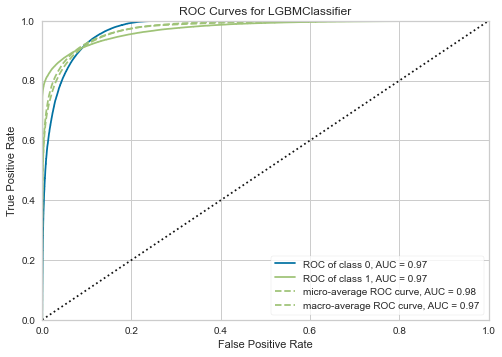

In [10]:
plot_model(et_model)

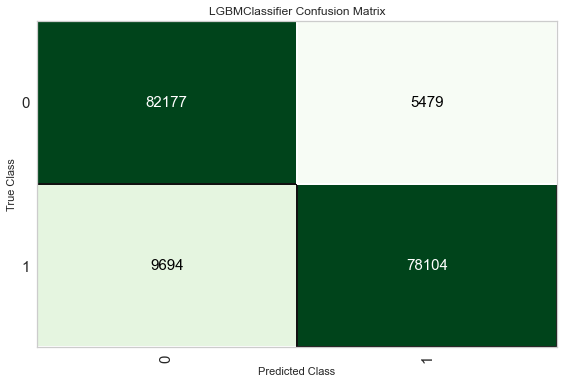

In [11]:
plot_model(et_model, plot='confusion_matrix')

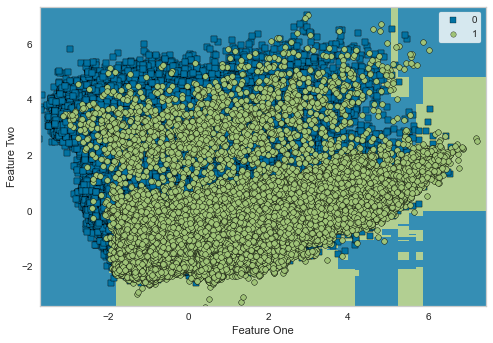

In [12]:
plot_model(et_model, plot='boundary')

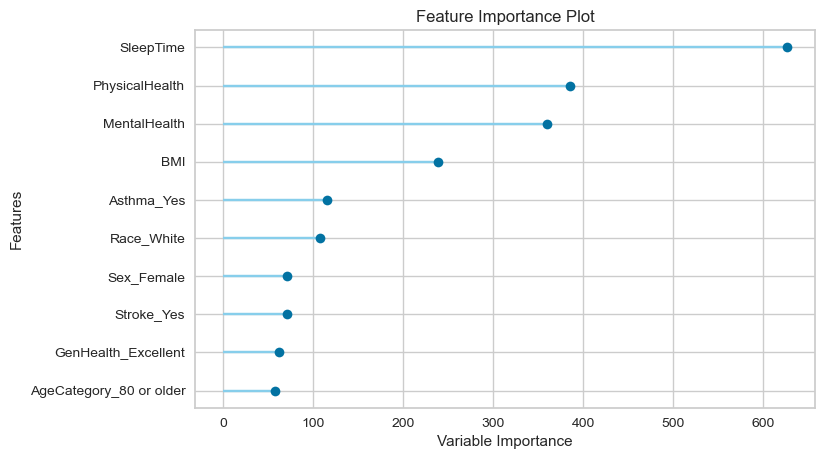

In [13]:
plot_model(et_model, plot='feature')

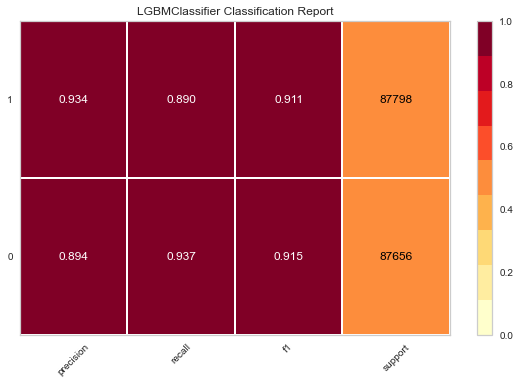

In [14]:
plot_model(et_model, plot='class_report')

In [15]:
# finalize the model
finalModel = finalize_model(et_model)

In [16]:
save_model(finalModel, "final_model")
save_config("model_config")

Transformation Pipeline and Model Successfully Saved
